# Key statistical concepts

Ref: https://towardsdatascience.com/fundamentals-of-statistics-for-data-scientists-and-data-analysts-69d93a05aae7

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Mean
$$
\mu = \frac{\sum_{i=1}^N x_i}{N}
$$

In [9]:
x = np.array([1, 3, 5, 6])
mean_x = np.mean(x)

# in case the data contains NaN values
x_nan = np.array([1, 3, 5, 6, np.nan])
mean_x_nan = np.mean(x_nan)
mean_x_ignan = np.nanmean(x_nan) # ignore NaN values

print(mean_x)
print(mean_x_nan)
print(mean_x_ignan)

3.75
nan
3.75


### Variance
$$
\sigma^2=\frac{\sum_{i=1}^N (x_i-\mu)^2}{N}
$$

In [10]:
x = np.array([1, 3, 5, 6])
variance_x = np.var(x)

# in case the data contains NaN values
x_nan = np.array([1, 3, 5, 6, np.nan])
variance_x_nan = np.nanvar(x_nan)

print(variance_x, variance_x_nan)

3.6875 3.6875


### Standard Deviation
- square root of the variance
$$
\sigma=\sqrt{\frac{\sum_{i=1}^N (x_i-\mu)^2}{N}}
$$

In [11]:
x = np.array([1, 3, 5, 6])
std_x = np.std(x)

# in case the data contains NaN values
x_nan = np.array([1, 3, 5, 6, np.nan])
std_x_nan = np.nanstd(x_nan)

print(std_x, std_x_nan)

1.920286436967152 1.920286436967152


### Covariance
$$
Cov(X, Y) = \mathbf{E}[(X-\mathbf{E}(X))(Y-\mathbf{E}(Y))]
$$

- expected value of the product of two random variables' deviations from their means
- A positive covariance indicates that two random variables tend to vary in the same direction.
- A negative covariance indicates that two random variables tend to vary in the opposite direction.

In [13]:
x = np.array([1, 3, 5, 6])
y = np.array([-2, -4, -5, -6])

# this will return the covariance matrix of x and y
# which contains x_variance, y_variance on diagonal elements and covariance of x and y
cov_xy = np.cov(x, y)
print(cov_xy)

[[ 4.91666667 -3.75      ]
 [-3.75        2.91666667]]


### Correlation
$$
Cor(X, Y) = \frac{Cov(X, Y)}{\sigma_x \sigma_y}
$$


- measures both the strengths and the directions of the linear relationship between two variables.
- equal to the covariance between two variables divided to the product of the standard deviations of these variables.
- correlation coefficients' values range between -1 and 1.
- the correlation of a variable with itself is always 1.
- a correlation is not causation. 

In [14]:
x = np.array([1, 3, 5, 6])
y = np.array([-2, -4, -5, -6])

corr_xy = np.corrcoef(x, y)
print(corr_xy)

[[ 1.         -0.99026741]
 [-0.99026741  1.        ]]


### Probability Distribution Functions

Discrete pdf
- Bernoulli
- Binomial
- Poisson
- Discrete Uniform

Continuous pdf
- Normal
- Continuous Uniform
- Cauchy

#### Bernoulli
- a discrete probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability q=1-p. 

#### Binomial
$$
Pr(X=k) = \bigl(\begin{smallmatrix}
    n \\
    k 
  \end{smallmatrix} \bigr) p^k q^{n-k}
$$
- a discrete probability distribution of the number of success in a sequence of **n** independent experiments, each with boolean-valued outcome: ***success*** (with probability **p**) or failure (with probability **q**=1-p).
- $\mathbf{E}(X) = np$
- $Var(X) = npq$
- useful when analyzing the results of repeated independent experiments

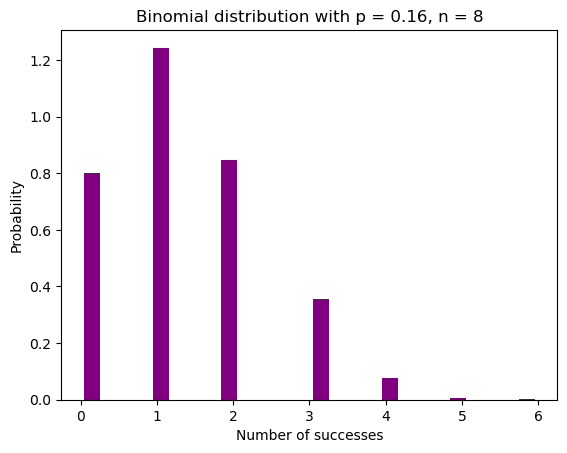

In [16]:
# Random generation of 1000 independent Binomial samples
n = 8 # number of independent trials
p = 0.16 # success probability
N = 1000
X = np.random.binomial(n, p, N)

# Histogramof Binomial distribution
counts, bins, ignoredd = plt.hist(X, 20, density=True, rwidth=0.7, color='purple')
plt.title('Binomial distribution with p = 0.16, n = 8')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.show()

#### Poisson Distribution
$$
Pr(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

- a discrete probability distribution of the number of events occurring in a specified time period, given the average number of times the event occurs over that time period.
- $\lambda$ is the ***arrival rate parameter***.
- $\mathbf{E}(X)=\lambda$
- $Var(X)=\lambda$

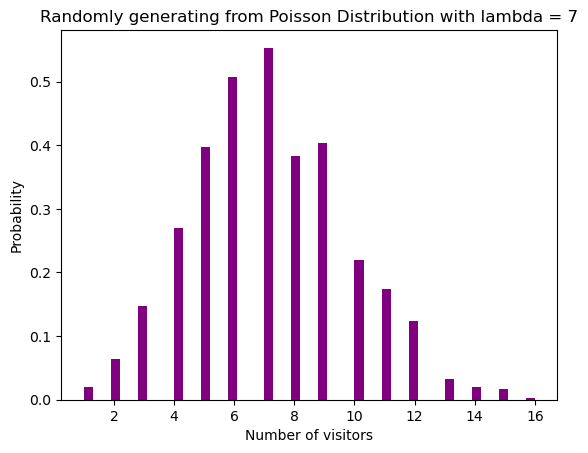

In [19]:
# Random generation of 1000 independent Poisson samples
lambda_ = 7
N = 1000
X = np.random.poisson(lambda_, N)

# Histogram of Poisson distribution
counts, bins, ignored = plt.hist(X, 50, density=True, color='purple')
plt.title('Randomly generating from Poisson Distribution with lambda = 7')
plt.xlabel('Number of visitors')
plt.ylabel('Probability')
plt.show()

#### Normal Distribution
$$
Pr(X=k) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

- $\mathbf{E}(X)=\mu$
- $Var(X)=\sigma^2$

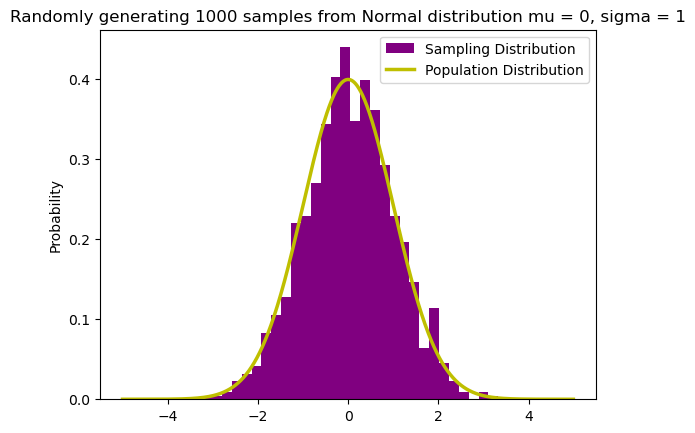

In [29]:
# Random generation of 1000 independent Normal samples
mu = 0
sigma = 1
N = 1000
X = np.random.normal(mu, sigma, N)

# Population distribution
from scipy.stats import norm
x_values = np.arange(-5, 5, 0.01)
y_values = norm.pdf(x_values)

# Sample histogram with population distribution
counts, bins, ignoredd = plt.hist(X, 30, density=True, color='purple', label='Sampling Distribution')
plt.plot(x_values, y_values, color='y', linewidth=2.5, label='Population Distribution')
plt.title('Randomly generating 1000 samples from Normal distribution mu = 0, sigma = 1')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Bayes Theorem
$$
Pr(X|Y) = \frac{Pr(Y|X) Pr(X)}{Pr(Y)}
$$